In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

In [148]:
reovirus_data_mock = pd.read_csv("./../../../../MouseInfectionImages/Mock/Summary_if_reovirus.csv", index_col=0)
reovirus_data_T1L = pd.read_csv("./../../../../MouseInfectionImages/T1L/Summary_if_reovirus.csv", index_col=0)
reovirus_data_K287T = pd.read_csv("./../../../../MouseInfectionImages/K287T/Summary_if_reovirus.csv", index_col=0)

In [149]:
reovirus_data = pd.concat([reovirus_data_mock, reovirus_data_T1L, reovirus_data_K287T]).drop_duplicates(subset ="Label")
reovirus_data["Condition"] = [x.split("-")[0].split("_")[0] for x in reovirus_data["Label"]]
reovirus_data["Measurement"] = [x.split(":")[1] for x in reovirus_data["Label"]]
reovirus_data_measurement = reovirus_data[reovirus_data["Measurement"].isin(["reovirus"])]
reovirus_data_total = reovirus_data[reovirus_data["Measurement"].isin(["total"])]
reovirus_data_final = reovirus_data_measurement
reovirus_data_final["Percent"] = (reovirus_data_measurement["Area"].to_numpy()/ reovirus_data_total["Area"].to_numpy()) * 100

reovirus_data_final["Condition"] = reovirus_data_final["Condition"].astype("category")
reovirus_data_final["Condition"].cat.reorder_categories(new_categories=["Mock", "T1L",  "K287T"], inplace = True)

<ipython-input-149-4a6e3c26c719>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reovirus_data_final["Percent"] = (reovirus_data_measurement["Area"].to_numpy()/ reovirus_data_total["Area"].to_numpy()) * 100
<ipython-input-149-4a6e3c26c719>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reovirus_data_final["Condition"] = reovirus_data_final["Condition"].astype("category")
<ipython-input-149-4a6e3c26c719>:10: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and 

No handles with labels found to put in legend.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

T1L vs. K287T: Mann-Whitney-Wilcoxon test two-sided, P_val:2.857e-02 U_stat=1.600e+01


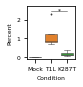

In [150]:
fig, ax = plt.subplots(figsize=(1.2, 1.2))
plt.rc('font', size=6)
ax.set_axisbelow(True)
plt.grid(False)
sns.boxplot(data = reovirus_data_final, y= "Percent", x = "Condition", linewidth = 0.5, fliersize = 1.0, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
plt.tight_layout()
pairs=[("T1L", "K287T")]
annotator = Annotator(ax, pairs, data=reovirus_data_final, x="Condition", y="Percent")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', text_offset = -2, line_offset = -2, line_width = 0.5, line_height = 0, line_offset_to_group = 0)
annotator.apply_and_annotate()
# plt.show()
plt.savefig("figures/imaging_IF_reovirus_area.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

No handles with labels found to put in legend.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

T1L vs. K287T: Mann-Whitney-Wilcoxon test two-sided, P_val:2.857e-02 U_stat=1.600e+01


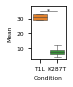

In [151]:
reovirus_data_final = reovirus_data_final[reovirus_data_final["Condition"].isin(["T1L", "K287T"])]
fig, ax = plt.subplots(figsize=(1.0, 1.2))
plt.rc('font', size=6)
ax.set_axisbelow(True)
plt.grid(False)
sns.boxplot(data = reovirus_data_final, y= "Mean", x = "Condition", linewidth = 0.5, fliersize = 1.0, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
plt.tight_layout()
pairs=[("T1L", "K287T")]
annotator = Annotator(ax, pairs, data=reovirus_data_final, x="Condition", y="Mean")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', text_offset = -2, line_offset = -2, line_width = 0.5, line_height = 0, line_offset_to_group = 0)
annotator.apply_and_annotate()
# plt.show()
plt.savefig("figures/imaging_IF_reovirus_intensity.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

In [152]:
casp1_data_mock = pd.read_csv("./../../../../MouseInfectionImages/Mock/Summary_if_casp1.csv", index_col=0)
casp1_data_T1L = pd.read_csv("./../../../../MouseInfectionImages/T1L/Summary_if_casp1.csv", index_col=0)
casp1_data_K287T = pd.read_csv("./../../../../MouseInfectionImages/K287T/Summary_if_casp1.csv", index_col=0)
casp1_data = pd.concat([casp1_data_mock, casp1_data_T1L, casp1_data_K287T]).drop_duplicates(subset ="Label")

casp1_data
casp1_data["Condition"] = [x.split("-")[0].split("_")[0] for x in casp1_data["Label"]]
casp1_data["Measurement"] = [x.split(":")[1] for x in casp1_data["Label"]]
casp1_data_measurement = casp1_data[casp1_data["Measurement"].isin(["casp1"])]
casp1_data_measurement
casp1_data_final = casp1_data_measurement
casp1_data_final["Percent"] = (casp1_data_measurement["Area"].to_numpy()/ reovirus_data_total["Area"].to_numpy()) * 100
casp1_data_final

,Label,Area,Mean,Min,Max,IntDen,RawIntDen,Condition,Measurement,Percent
,,,,,,,,,,
1,Mock-Set1_slide9_heart1_stitch_stitch_stitch_c...,0.227,78.821,50,91,17.907,1611648.0,Mock,casp1,0.017520
2,Mock-Set1_slide9_heart2_stitch_stitch_stitch_c...,0.589,70.753,50,91,41.676,3750837.0,Mock,casp1,0.030151
1,T1L-Set1_slide9_heart1_stitch_stitch_c3.tif:casp1,5.316,80.499,50,91,427.914,38512227.0,T1L,casp1,0.316595
2,T1L-Set1_slide9_heart2_stitch_stitch_stitch_c3...,5.842,74.505,0,91,435.249,39172373.0,T1L,casp1,0.308494
3,T1L-Set2_slide9_heart1_stitch_c3.tif:casp1,2.370,76.756,0,91,181.905,16371448.0,T1L,casp1,0.152343
4,T1L-Set2_slide9_heart2_stitch_c3.tif:casp1,2.080,76.396,0,91,158.870,14298320.0,T1L,casp1,0.130138
1,K287T_Set1_slide4_heart1_shad_shad_shad_c3.tif...,0.393,76.272,24,91,29.992,2699280.0,K287T,casp1,0.022779
2,K287T_Set1_slide4_heart2_shad_shad_shad_c3.tif...,0.620,75.223,5,91,46.666,4199940.0,K287T,casp1,0.042286
3,K287T_Set2_slide0_heart1_shad_shad_c3.tif:casp1,0.069,80.735,48,91,5.590,503141.0,K287T,casp1,0.004314


No handles with labels found to put in legend.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

T1L vs. K287T: Mann-Whitney-Wilcoxon test two-sided, P_val:2.857e-02 U_stat=1.600e+01


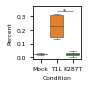

In [153]:
fig, ax = plt.subplots(figsize=(1.2, 1.2))
plt.rc('font', size=6)
ax.set_axisbelow(True)
plt.grid(False)
sns.boxplot(data = casp1_data_final, y= "Percent", x = "Condition", linewidth = 0.5, fliersize = 1.0, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
plt.tight_layout()
pairs=[("T1L", "K287T")]
annotator = Annotator(ax, pairs, data=casp1_data_final, x="Condition", y="Percent")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', text_offset = -2, line_offset = -2, line_width = 0.5, line_height = 0, line_offset_to_group = 0)
annotator.apply_and_annotate()
# plt.show()
plt.savefig("figures/imaging_IF_casp1_area.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

In [154]:
hne_data_mock = pd.read_csv("./../../../../MouseInfectionImages/Mock/Summary_hne_area.csv", index_col=0)
hne_data_T1L = pd.read_csv("./../../../../MouseInfectionImages/T1L/Summary_hne_area.csv", index_col=0)
hne_data_K287T = pd.read_csv("./../../../../MouseInfectionImages/K287T/Summary_hne_area.csv", index_col=0)
hne_data = pd.concat([hne_data_mock, hne_data_T1L, hne_data_K287T]).drop_duplicates(subset ="Label")
hne_data["Condition"] = [x.split("-")[0].split("_")[0] for x in hne_data["Label"]]
hne_data["Measurement"] = [x.split(":")[1] for x in hne_data["Label"]]
hne_data_measurement = hne_data[hne_data["Measurement"].isin(["myocarditic"])]
hne_data_total = hne_data[hne_data["Measurement"].isin(["total"])]
hne_data_final = hne_data_measurement
hne_data_final["Percent"] = (hne_data_measurement["Area"].to_numpy()/ hne_data_total["Area"].to_numpy()) * 100
hne_data_final

<ipython-input-154-29379e7f175e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hne_data_final["Percent"] = (hne_data_measurement["Area"].to_numpy()/ hne_data_total["Area"].to_numpy()) * 100


,Label,Area,Mean,Min,Max,IntDen,RawIntDen,Condition,Measurement,Percent
,,,,,,,,,,
2,Mock-Set1_slide5_heart1_stitch_stitch.tif:myoc...,1.786,142.204,0,255,253.996,2.285960e+07,Mock,myocarditic,0.162544
4,Mock-Set1_slide5_heart2_stitch_stitch.tif:myoc...,3.212,144.265,0,255,463.432,4.170890e+07,Mock,myocarditic,0.220134
1,T1L-Set1_slide5_heart1_stitch.tif:myocarditic,69.078,123.493,0,255,8530.596,7.677536e+08,T1L,myocarditic,5.491878
3,T1L-Set1_slide5_heart2_stitch_stitch.tif:myoca...,153.140,119.113,0,255,18240.966,1.641687e+09,T1L,myocarditic,13.190433
5,T1L-Set2_slide5_heart1_stitch_stitch.tif:myoca...,54.496,134.602,0,255,7335.219,6.601698e+08,T1L,myocarditic,3.912517
7,T1L-Set2_slide5_heart2_stitch_stitch.tif:myoca...,38.887,143.444,0,255,5578.160,5.020344e+08,T1L,myocarditic,3.972614
9,K287T_Set1_slide5_heart1_stitch_shad.tif:myoca...,31.580,124.522,0,255,3932.396,3.539157e+08,K287T,myocarditic,2.718734
11,K287T_Set1_slide5_heart2_stitch_shad.tif:myoca...,7.195,124.470,0,255,895.537,8.059830e+07,K287T,myocarditic,0.566700
13,K287T_Set2_slide1_heart1_shad.tif:myocarditic,10.454,134.484,0,255,1405.955,1.265359e+08,K287T,myocarditic,2.040354


No handles with labels found to put in legend.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

T1L vs. K287T: Mann-Whitney-Wilcoxon test two-sided, P_val:2.857e-02 U_stat=1.600e+01


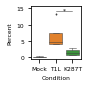

In [155]:
fig, ax = plt.subplots(figsize=(1.2, 1.2))
plt.rc('font', size=6)
ax.set_axisbelow(True)
plt.grid(False)
sns.boxplot(data = hne_data_final, y= "Percent", x = "Condition", linewidth = 0.5, fliersize = 1.0, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
plt.tight_layout()
pairs=[("T1L", "K287T")]
annotator = Annotator(ax, pairs, data=hne_data_final, x="Condition", y="Percent")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', text_offset = -2, line_offset = -2, line_width = 0.5, line_height = 0, line_offset_to_group = 0)
annotator.apply_and_annotate()
# plt.show()
plt.savefig("figures/imaging_hne_area.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

In [156]:
trbc1_data_mock = pd.read_csv("./../../../../MouseInfectionImages/Mock/Summary_tcells_trbc2.csv")
trbc1_data_T1L = pd.read_csv("./../../../../MouseInfectionImages/T1L/Summary_tcell_trbc2.csv")
trbc1_data_K287T = pd.read_csv("./../../../../MouseInfectionImages/K287T/Summary_tcell_trbc2.csv")
trbc1_data = pd.concat([trbc1_data_mock, trbc1_data_T1L, trbc1_data_K287T]).drop_duplicates(subset ="Slice")

trbc1_data_mock = pd.read_csv("./../../../../MouseInfectionImages/Mock/Summary_tcell_nuclei.csv")
trbc1_data_T1L = pd.read_csv("./../../../../MouseInfectionImages/T1L/Summary_tcell_nuclei.csv")
trbc1_data_K287T = pd.read_csv("./../../../../MouseInfectionImages/K287T/Summary_tcell_nuclei.csv")
trbc1_data_total = pd.concat([trbc1_data_mock, trbc1_data_T1L, trbc1_data_K287T]).drop_duplicates(subset ="Slice")

trbc1_data_final = trbc1_data
trbc1_data_final["Percent"] = (trbc1_data["Count"].to_numpy()/ trbc1_data_total["Count"].to_numpy()) * 100
trbc1_data["Condition"] = [x.split("-")[0].split("_")[0] for x in trbc1_data["Slice"]]
trbc1_data_final

,Slice,Count,Total Area,Average Size,%Area,Mean,IntDen,Percent,Condition
0,Mock-Set1_slide7_heart1_stitch_stitch_stitch_c...,5,13.602,2.720,0.000654,255,693.706,0.009625,Mock
1,Mock-Set1_slide7_heart2_stitch_stitch_stitch_c...,15,56.474,3.765,0.002000,255,960.065,0.026000,Mock
0,T1L-Set1_slide7_heart1_stitch_stitch_c2.tif,932,3797.404,4.074,0.195000,255,NaN,1.624911,T1L
1,T1L-Set1_slide7_heart2_stitch_stitch_stitch_c2...,1191,4637.669,3.894,0.184000,255,NaN,2.341907,T1L
2,T1L-Set2_slide7_heart1_stitch_stitch_stitch_c2...,960,3587.375,3.737,0.194000,255,NaN,1.731852,T1L
3,T1L-Set2_slide7_heart2_stitch_stitch_stitch_c2...,432,1662.086,3.847,0.049000,255,NaN,0.914189,T1L
0,K287T_Set1_slide6_heart1_stitch_stitch_stitch_...,412,1571.786,3.815,0.086000,255,NaN,0.865583,K287T
1,K287T_Set1_slide6_heart2_stitch_stitch_stitch_...,177,619.059,3.498,0.036000,255,NaN,0.341218,K287T
2,K287T_Set2_slide3_heart1_stitch_stitch_c2.tif,901,3522.241,3.909,0.113000,255,NaN,1.946257,K287T
3,K287T_Set2_slide3_heart2_stitch_stitch_c2.tif,367,1412.406,3.849,0.060000,255,NaN,0.614658,K287T


No handles with labels found to put in legend.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

T1L vs. K287T: Mann-Whitney-Wilcoxon test two-sided, P_val:2.000e-01 U_stat=1.300e+01


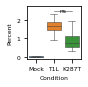

In [157]:
fig, ax = plt.subplots(figsize=(1.2, 1.2))
plt.rc('font', size=6)
ax.set_axisbelow(True)
plt.grid(False)
sns.boxplot(data = trbc1_data_final, y= "Percent", x = "Condition", linewidth = 0.5, fliersize = 1.0, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
plt.tight_layout()
pairs=[("T1L", "K287T")]
annotator = Annotator(ax, pairs, data=trbc1_data_final, x="Condition", y="Percent")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', text_offset = -2, line_offset = -2, line_width = 0.5, line_height = 0, line_offset_to_group = 0)
annotator.apply_and_annotate()
# plt.show()
plt.savefig("figures/imaging_tcells.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

In [160]:
prf1_data_mock = pd.read_csv("./../../../../MouseInfectionImages/Mock/Summary_tcells_prf1.csv")
prf1_data_T1L = pd.read_csv("./../../../../MouseInfectionImages/T1L/Summary_tcell_prf1.csv")
prf1_data_K287T = pd.read_csv("./../../../../MouseInfectionImages/K287T/Summary_tcell_prf1.csv")
prf1_data = pd.concat([prf1_data_mock, prf1_data_T1L, prf1_data_K287T]).drop_duplicates(subset ="Slice")

prf1_data_mock = pd.read_csv("./../../../../MouseInfectionImages/Mock/Summary_tcell_nuclei.csv")
prf1_data_T1L = pd.read_csv("./../../../../MouseInfectionImages/T1L/Summary_tcell_nuclei.csv")
prf1_data_K287T = pd.read_csv("./../../../../MouseInfectionImages/K287T/Summary_tcell_nuclei.csv")
prf1_data_total = pd.concat([prf1_data_mock, prf1_data_T1L, prf1_data_K287T]).drop_duplicates(subset ="Slice")

prf1_data_final = prf1_data
prf1_data_final["Percent"] = (prf1_data["Count"].to_numpy()/ prf1_data_total["Count"].to_numpy()) * 100
prf1_data["Condition"] = [x.split("-")[0].split("_")[0] for x in prf1_data["Slice"]]
prf1_data_final

,Slice,Count,Total Area,Average Size,%Area,Mean,IntDen,Percent,Condition
0,Mock-Set1_slide7_heart1_stitch_stitch_stitch_c...,5,27.419,5.484,0.001,255.0,1398.388,0.009625,Mock
1,Mock-Set1_slide7_heart2_stitch_stitch_stitch_c...,0,0.000,NaN,0.000,NaN,NaN,0.000000,Mock
0,T1L-Set1_slide7_heart1_stitch_stitch_c4.tif,284,1077.742,3.795,0.055,255.0,NaN,0.495144,T1L
1,T1L-Set1_slide7_heart2_stitch_stitch_stitch_c4...,1530,6950.316,4.543,0.276,255.0,NaN,3.008495,T1L
2,T1L-Set2_slide7_heart1_stitch_stitch_stitch_c4...,396,1531.769,3.868,0.083,255.0,NaN,0.714389,T1L
3,T1L-Set2_slide7_heart2_stitch_stitch_stitch_c4...,235,802.379,3.414,0.024,255.0,NaN,0.497302,T1L
0,K287T_Set1_slide6_heart1_stitch_stitch_stitch_...,153,623.873,4.078,0.034,255.0,NaN,0.321442,K287T
1,K287T_Set1_slide6_heart2_stitch_stitch_stitch_...,82,275.090,3.355,0.016,255.0,NaN,0.158078,K287T
2,K287T_Set2_slide3_heart1_stitch_stitch_c4.tif,125,456.932,3.655,0.015,255.0,NaN,0.270013,K287T
3,K287T_Set2_slide3_heart2_stitch_stitch_c4.tif,101,366.732,3.631,0.016,255.0,NaN,0.169157,K287T


No handles with labels found to put in legend.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

T1L vs. K287T: Mann-Whitney-Wilcoxon test two-sided, P_val:2.857e-02 U_stat=1.600e+01


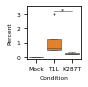

In [161]:
fig, ax = plt.subplots(figsize=(1.2, 1.2))
plt.rc('font', size=6)
ax.set_axisbelow(True)
plt.grid(False)
sns.boxplot(data = prf1_data_final, y= "Percent", x = "Condition", linewidth = 0.5, fliersize = 1.0, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
plt.tight_layout()
pairs=[("T1L", "K287T")]
annotator = Annotator(ax, pairs, data=prf1_data_final, x="Condition", y="Percent")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', text_offset = -2, line_offset = -2, line_width = 0.5, line_height = 0, line_offset_to_group = 0)
annotator.apply_and_annotate()
# plt.show()
plt.savefig("figures/imaging_prf1.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)